In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix 
import numpy as np
import seaborn as sns

In [2]:
def load_data():
    
    X = pd.read_csv('train_values.csv' ,index_col=[0])
    y = pd.read_csv('train_labels.csv',index_col=[0])
    test = pd.read_csv('test_values.csv',index_col=[0])
    
    return X,y,test
    
X,y,test = load_data()

In [3]:
display(X.head(2).append(X.tail(2)),test.head(),y.head(4))

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0
2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0


,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
patient_id,,,,,,,,,,,,,
olalu7,2,reversible_defect,170,1,0,0,2,288,0.2,1,59,159,0
z9n6mx,1,normal,138,4,0,0,0,183,1.4,0,35,182,0
5k4413,2,reversible_defect,120,4,0,0,2,177,2.5,1,43,120,1
mrg7q5,1,normal,102,3,1,0,0,318,0.0,0,60,160,0
uki4do,2,normal,138,4,1,0,2,166,3.6,1,61,125,1


,heart_disease_present
patient_id,
0z64un,0
ryoo3j,0
yt1s1x,1
l2xjde,1


In [4]:
print(str(X.shape)+"\n",str(y.shape)+"\n",str(test.shape)+"\n")


(180, 13)
 (180, 1)
 (90, 13)



In [5]:
# unique values
X.nunique()

slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
dtype: int64

In [6]:
# info 
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0z64un to 2nx10r
Data columns (total 13 columns):
slope_of_peak_exercise_st_segment       180 non-null int64
thal                                    180 non-null object
resting_blood_pressure                  180 non-null int64
chest_pain_type                         180 non-null int64
num_major_vessels                       180 non-null int64
fasting_blood_sugar_gt_120_mg_per_dl    180 non-null int64
resting_ekg_results                     180 non-null int64
serum_cholesterol_mg_per_dl             180 non-null int64
oldpeak_eq_st_depression                180 non-null float64
sex                                     180 non-null int64
age                                     180 non-null int64
max_heart_rate_achieved                 180 non-null int64
exercise_induced_angina                 180 non-null int64
dtypes: float64(1), int64(11), object(1)
memory usage: 19.7+ KB


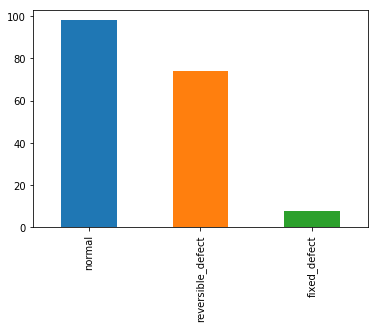

In [7]:
# object column

X['thal'].value_counts().plot(kind='bar')

In [8]:
### categorical column to numerical . 3 diffrent values , its ok to label them as numbers because they are ordered

# option 1 : dictionary


def conv_thal(dataframe):
    dictionary = {"normal": 0, "reversible_defect": 1, "fixed_defect" :2 }
    dataframe.thal.replace(dictionary, inplace=True)

conv_thal(X)
conv_thal(test)

# option 2: cat-codes

"""
X['thal'] = X['thal'].astype('category')
X.dtypes
X['thal'] = X['thal'].cat.codes
X['thal'].head()


"""
#option 3 : dummies

# X = pd.get_dummies(X, columns=["thal"])


# option 4 : lambda

"""
def convert_thal (thal) :
    if thal =='normal' :
        return int(1)
    elif thal =='reversible_defect' :
        return int(2)
    else : return int(3) 

    
X['thal'] = X.apply(lambda row: convert_thal(row['thal']) , axis=1)
X.head()

"""

# option 5 label encoder 
"""
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in X.columns:
    X[col] = labelencoder.fit_transform(X[col])
    test[col] = labelencoder.fit_transform(test[col])
 
"""

'\nfrom sklearn.preprocessing import LabelEncoder\nlabelencoder=LabelEncoder()\nfor col in X.columns:\n    X[col] = labelencoder.fit_transform(X[col])\n    test[col] = labelencoder.fit_transform(test[col])\n \n'

In [9]:
# find nulls
def findnulls(X):
    
    print("nulls in data : " ,X.isnull().values.any())
    nulls = X.isnull().sum()
    print(nulls[nulls > 0])
    print("=====")
    

findnulls(X)
findnulls(test)

nulls in data :  False
Series([], dtype: int64)
=====
nulls in data :  False
Series([], dtype: int64)
=====


In [10]:
# to categorical 

def cat_col_convert():

    cat_cols = ['slope_of_peak_exercise_st_segment', 'thal',
            'chest_pain_type', 'num_major_vessels',  
             'sex',
             'exercise_induced_angina']

    X[cat_cols]=X[cat_cols].astype('category')
    test[cat_cols]=test[cat_cols].astype('category')
    
cat_col_convert()

# Visualization

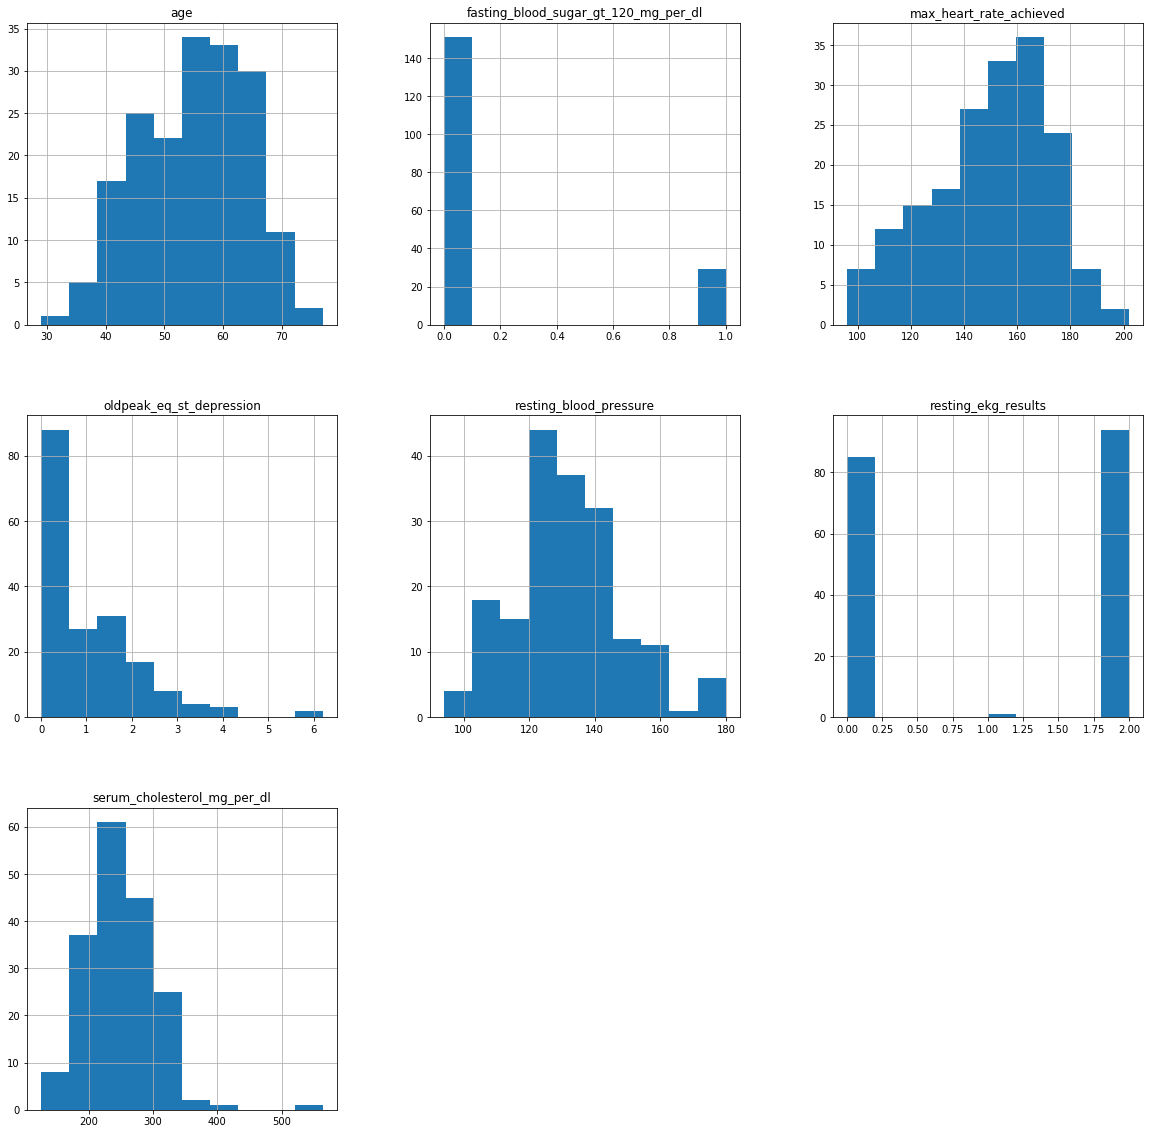

In [11]:
X.hist(figsize = (20, 20))
plt.show()

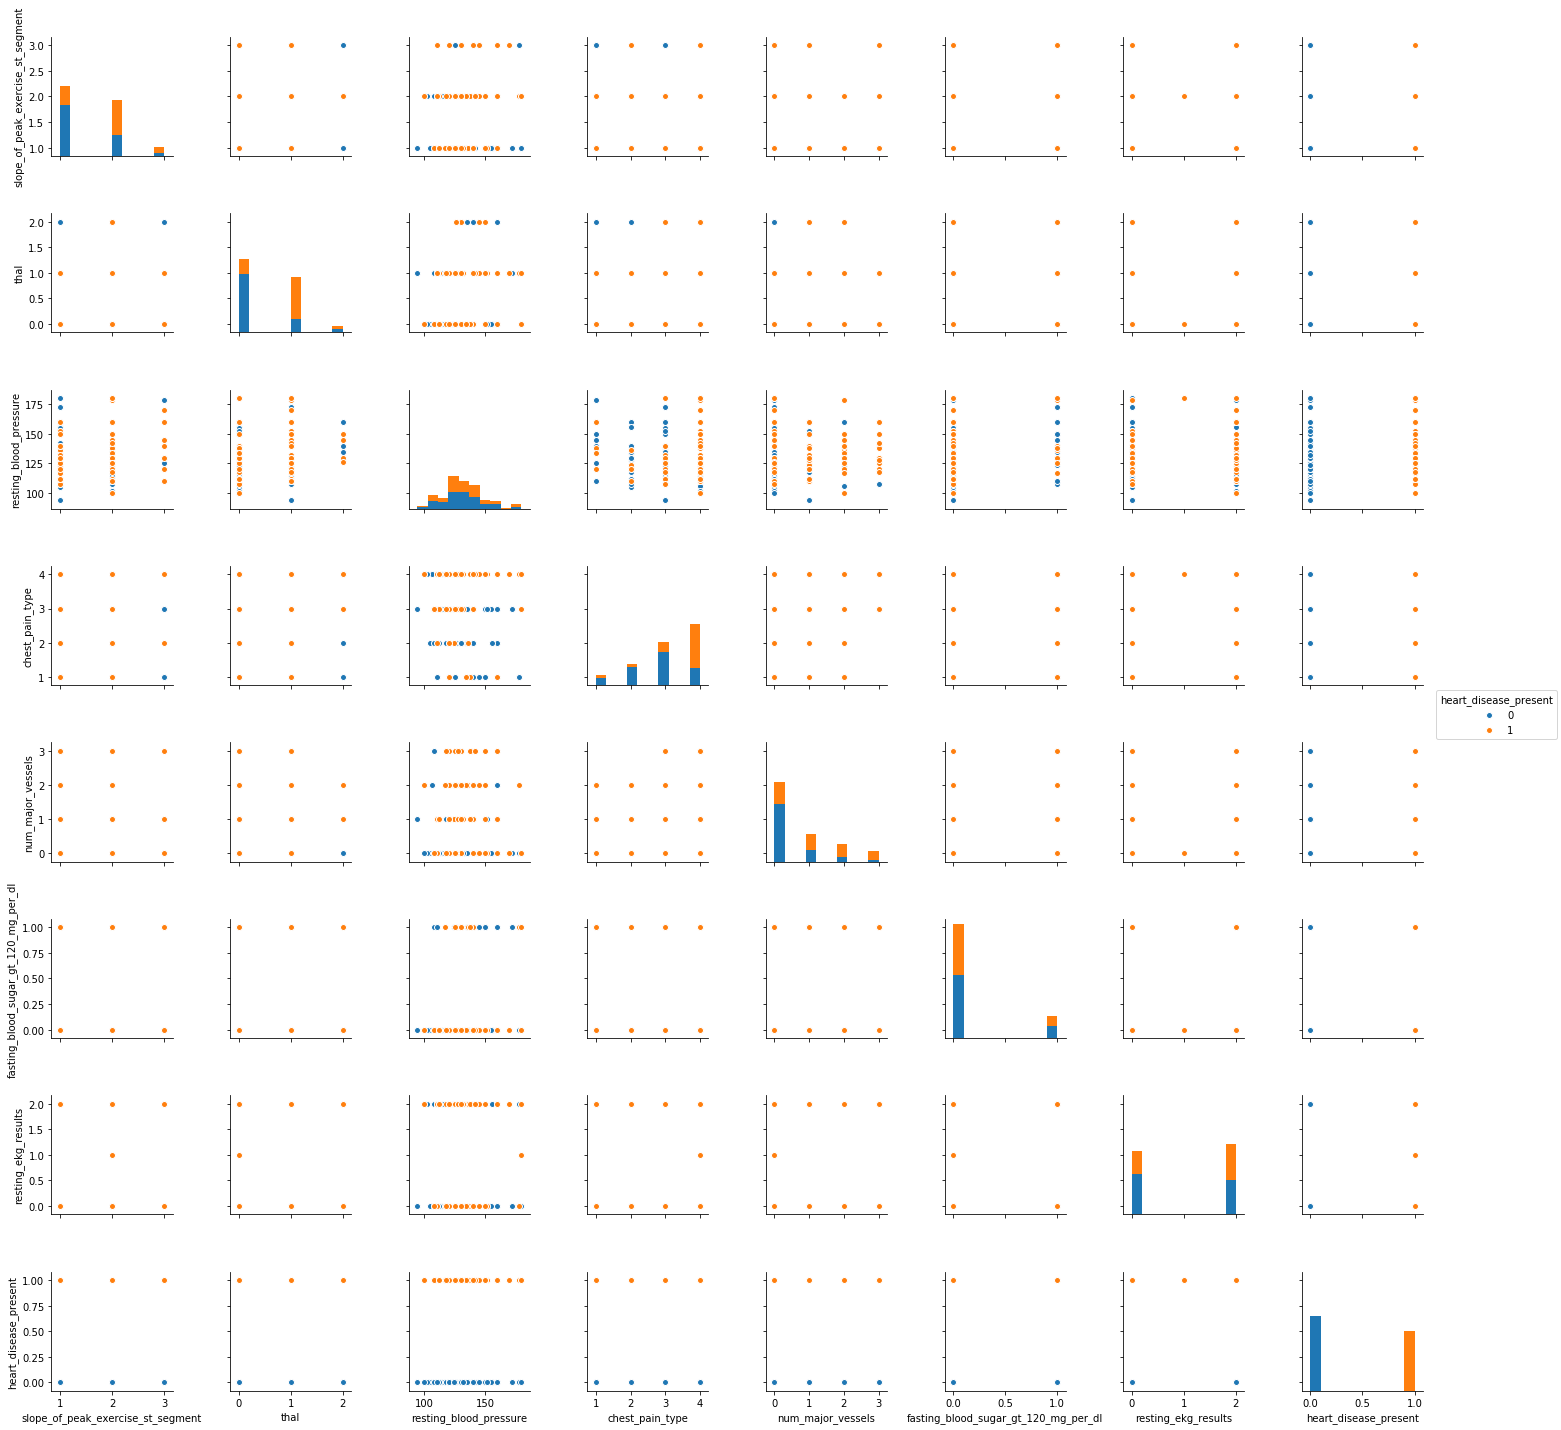

In [12]:

data = X.merge(y,on='patient_id')

a = sns.pairplot(data.iloc[:,[0,1,2,3,4,5,6,-1]],hue = 'heart_disease_present' ,size=2.5)


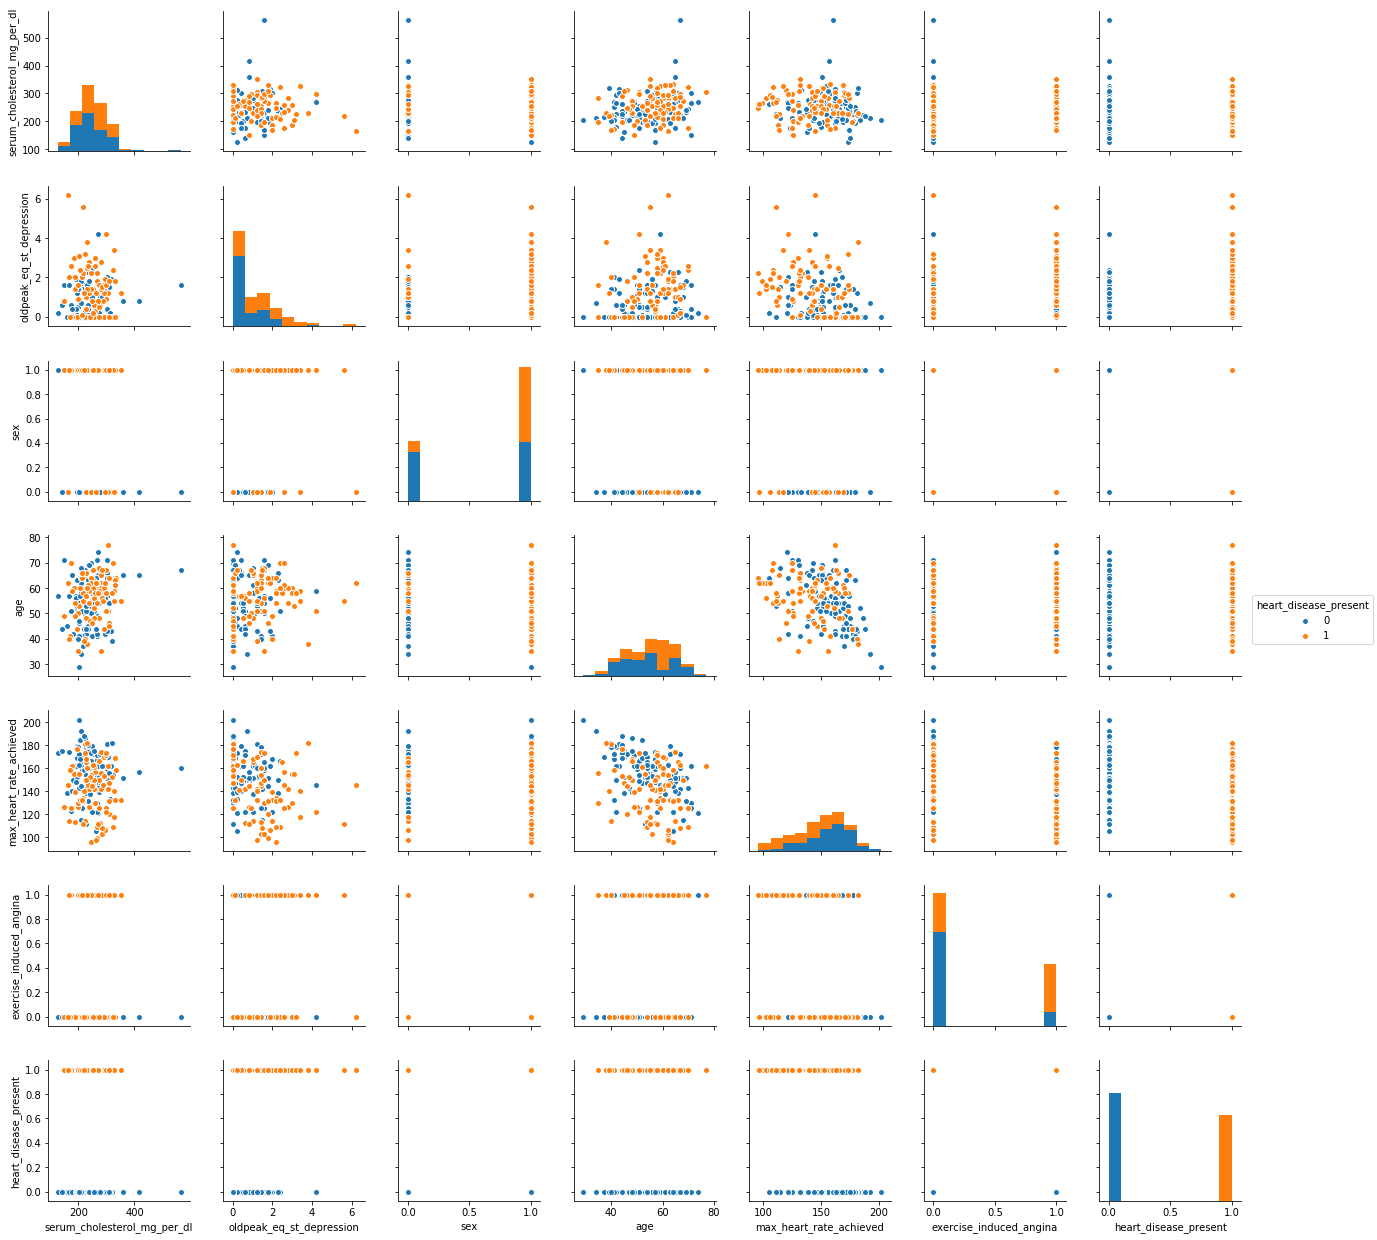

In [13]:
a = sns.pairplot(data.iloc[:,7:14],hue = 'heart_disease_present' ,size=2.5)

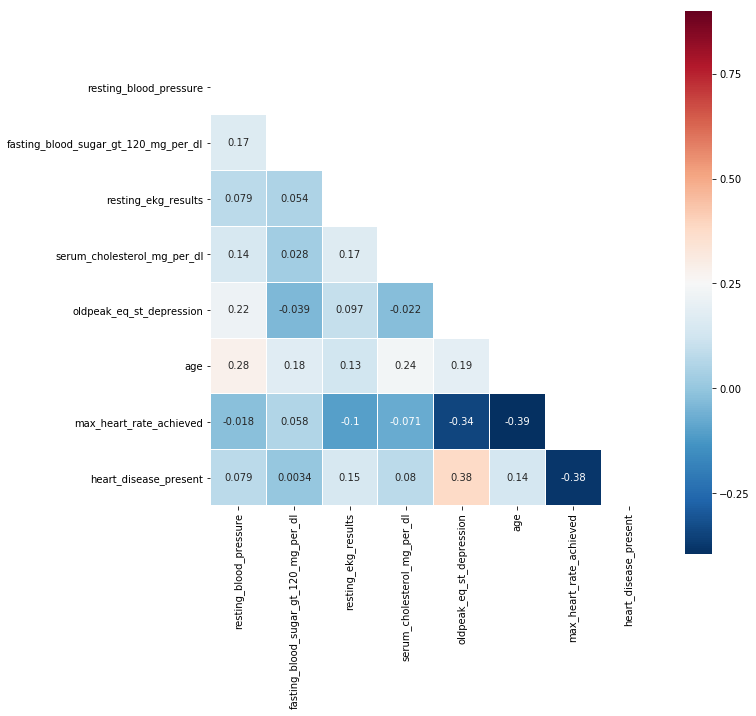

In [14]:
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = .9,
            square=True)

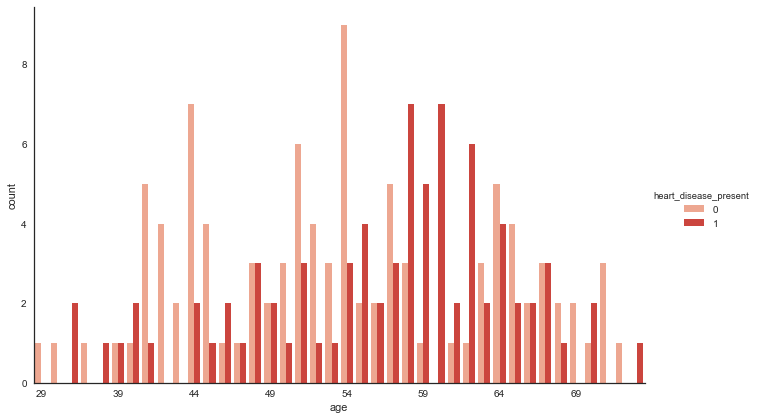

In [15]:

sns.set(style="white")

data = data

g = sns.factorplot(x='age',hue='heart_disease_present', data=data, kind="count",
                   palette="Reds", size=6, aspect=1.5)
g.set_xticklabels(step=5)

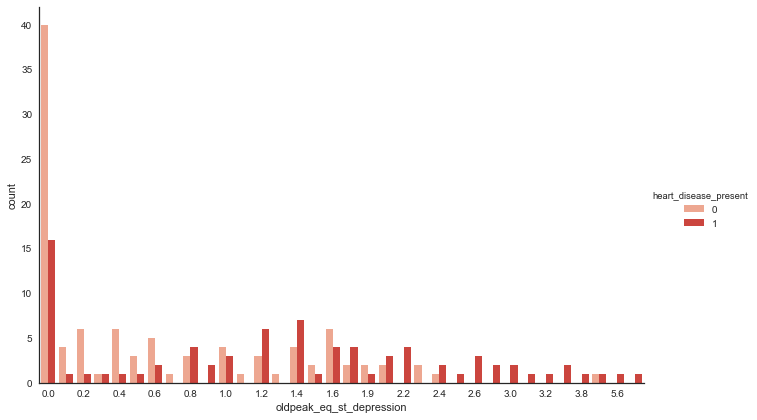

In [16]:

sns.set(style="white")

data = data

g = sns.factorplot(x='oldpeak_eq_st_depression',hue='heart_disease_present', data=data, kind="count",
                   palette="Reds", size=6, aspect=1.5)
g.set_xticklabels(step=2)

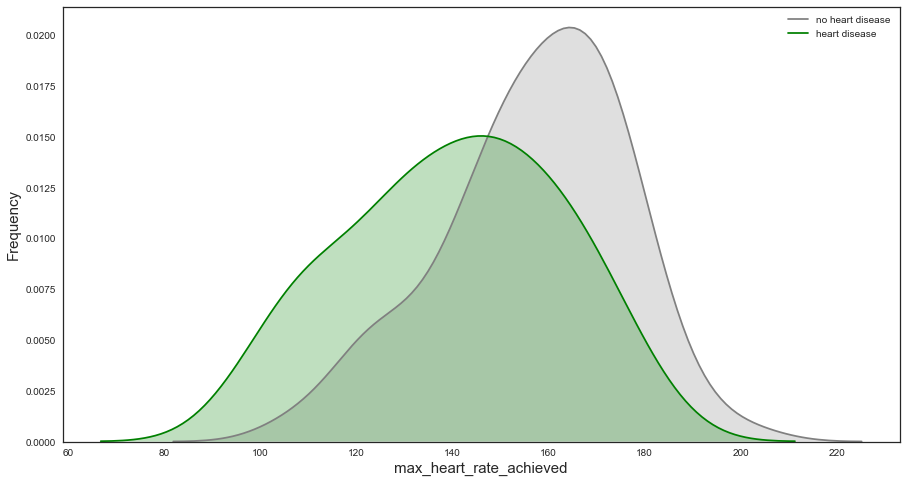

In [17]:
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(data.loc[(data['heart_disease_present'] == 0),'max_heart_rate_achieved'] , color='gray',shade=True,label='no heart disease')
ax=sns.kdeplot(data.loc[(data['heart_disease_present'] == 1),'max_heart_rate_achieved'] , color='g',shade=True, label='heart disease')
plt.xlabel("max_heart_rate_achieved", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

# Feature engineering 

In [18]:
# feature engineering 

def feature_eng():

    X['danger_group'] = X['age']*1/(1+X['oldpeak_eq_st_depression'])
    test['danger_group'] = test['age']*1/(1+test['oldpeak_eq_st_depression'])
    #X.drop('fasting_blood_sugar_gt_120_mg_per_dl',axis=1 , inplace=True)
    #test.drop('fasting_blood_sugar_gt_120_mg_per_dl',axis=1 , inplace=True)
    
    # new features from polynomialFeatures
    X['heartRateTimesDepression'] = X['max_heart_rate_achieved']*X['oldpeak_eq_st_depression']
    test['heartRateTimesDepression'] = test['max_heart_rate_achieved']*test['oldpeak_eq_st_depression']
    X['max_heart_rate_achieved^2'] = X['max_heart_rate_achieved']*X['max_heart_rate_achieved']
    test['max_heart_rate_achieved^2'] = test['max_heart_rate_achieved']*test['max_heart_rate_achieved']
    

feature_eng()

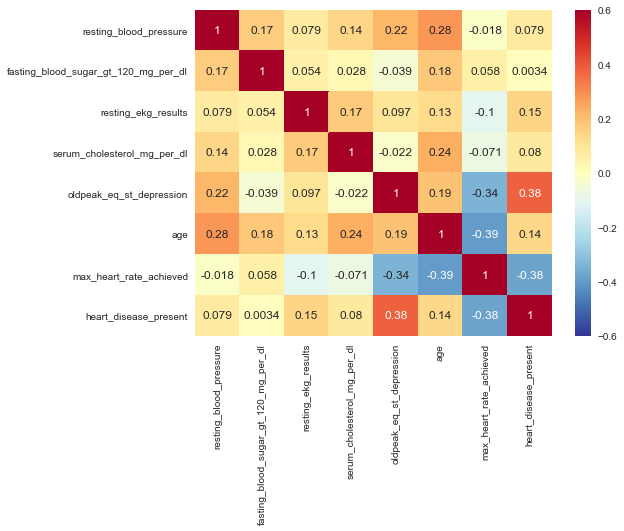

In [19]:
# features correlation

plt.figure(figsize = (8, 6))
cor = data.corr()
sns.heatmap(cor, cmap = plt.cm.RdYlBu_r, vmin = -0.6, annot = True, vmax = 0.6)

In [20]:
data.corr()['heart_disease_present'].sort_values()

max_heart_rate_achieved                -0.375352
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_blood_pressure                  0.078506
serum_cholesterol_mg_per_dl             0.079775
age                                     0.138255
resting_ekg_results                     0.145933
oldpeak_eq_st_depression                0.382930
heart_disease_present                   1.000000
Name: heart_disease_present, dtype: float64

In [21]:
# sklearn PolynomialFeatures

In [22]:
from sklearn.preprocessing import PolynomialFeatures

# Make a new dataframe for polynomial features
poly_features = data[['max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'resting_ekg_results', 'resting_ekg_results', 'heart_disease_present']]
poly_features_test = data[['max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'resting_ekg_results', 'resting_ekg_results']]


poly_target = poly_features['heart_disease_present'].values
poly_features = poly_features.drop(columns = ['heart_disease_present'])

                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (180, 35)


In [23]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['max_heart_rate_achieved', 'oldpeak_eq_st_depression', 'resting_ekg_results', 'resting_ekg_results']))

# Add in the target
poly_features['heart_disease_present'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['heart_disease_present'].sort_values()
poly_corrs

max_heart_rate_achieved                                                -0.375352
max_heart_rate_achieved^2                                              -0.372958
max_heart_rate_achieved^3                                              -0.368185
max_heart_rate_achieved^2 resting_ekg_results                           0.036624
max_heart_rate_achieved^2 resting_ekg_results                           0.036624
max_heart_rate_achieved resting_ekg_results^2                           0.086327
max_heart_rate_achieved resting_ekg_results resting_ekg_results         0.086327
max_heart_rate_achieved resting_ekg_results^2                           0.086327
max_heart_rate_achieved resting_ekg_results                             0.088826
max_heart_rate_achieved resting_ekg_results                             0.088826
resting_ekg_results^2 resting_ekg_results                               0.141006
resting_ekg_results resting_ekg_results^2                               0.141006
resting_ekg_results^3       

In [24]:
# new optional features

#[max_heart_rate_achieved]*[oldpeak_eq_st_depression ]
#max_heart_rate_achieved^2
#max_heart_rate_achieved^3

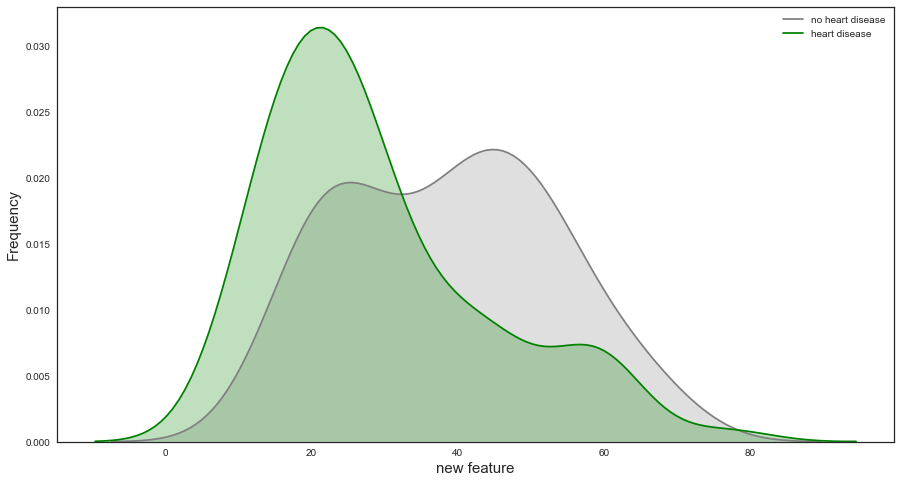

In [25]:
data = X.merge(y,on='patient_id')

fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(data.loc[(data['heart_disease_present'] == 0),'danger_group'] , color='gray',shade=True,label='no heart disease')
ax=sns.kdeplot(data.loc[(data['heart_disease_present'] == 1),'danger_group'] , color='g',shade=True, label='heart disease')
plt.xlabel("new feature", fontsize = 15)
plt.ylabel('Frequency', fontsize = 15);

In [26]:
data.head(2)

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,danger_group,heartRateTimesDepression,max_heart_rate_achieved^2,heart_disease_present
patient_id,,,,,,,,,,,,,,,,,
0z64un,1,0,128,2,0,0,2,308,0.0,1,45,170,0,45.000000,0.0,28900,0
ryoo3j,2,0,110,3,0,0,0,214,1.6,0,54,158,0,20.769231,252.8,24964,0


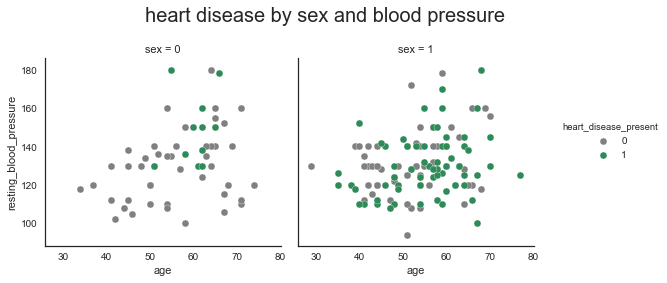

In [27]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(data,size=4, col="sex",  margin_titles=True, hue = "heart_disease_present",
                  palette=pal)
g = g.map(plt.scatter, "age","resting_blood_pressure", edgecolor = 'white').add_legend()
g.fig.suptitle("heart disease by sex and blood pressure", size = 20)
plt.subplots_adjust(top=0.8)



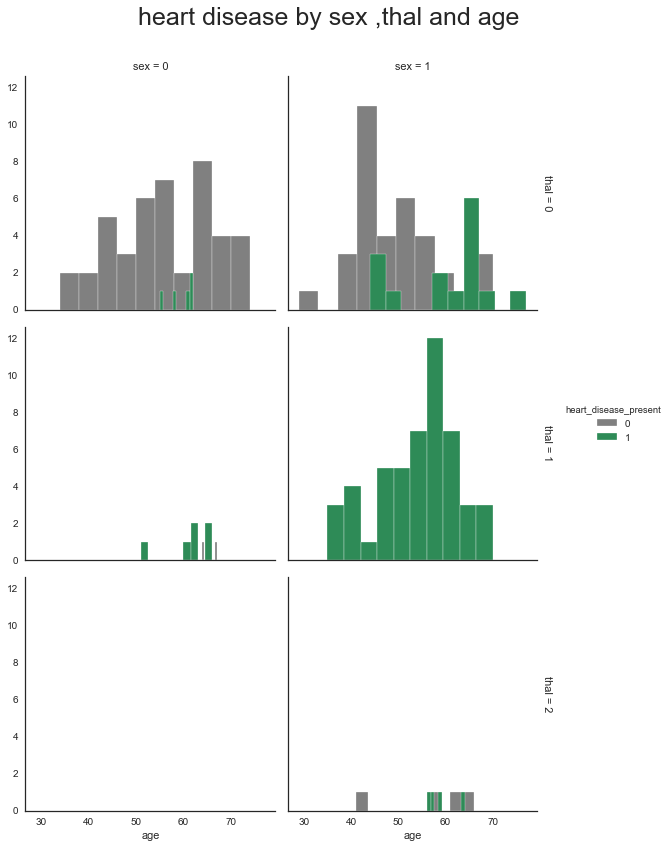

In [28]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(data,size=4, col="sex", row="thal", margin_titles=True, hue = "heart_disease_present",
                  palette=pal)
g = g.map(plt.hist, "age", edgecolor = 'white').add_legend()
g.fig.suptitle("heart disease by sex ,thal and age", size = 25)
plt.subplots_adjust(top=0.90)

In [29]:
#scale_cols = ['resting_blood_pressure','serum_cholesterol_mg_per_dl','age','max_heart_rate_achieved','oldpeak_eq_st_depression']

def scale_data(X,test):

    scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)
    X= pd.DataFrame(X_scaled, columns=X.columns,index = X.index)

    test_scaled = scaler.transform(test)
    test= pd.DataFrame(test_scaled, columns=test.columns,index = test.index)
    
    return X,test
X,test = scale_data(X,test)
X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,danger_group,heartRateTimesDepression,max_heart_rate_achieved^2
patient_id,,,,,,,,,,,,,,,,
0z64un,-0.891241,-0.858898,-0.195195,-1.234775,-0.718403,-0.438238,0.953850,1.118269,-0.903207,0.672022,-1.053964,0.932485,-0.680746,0.672617,-0.903251,0.946537
ryoo3j,0.729197,-0.858898,-1.256320,-0.166220,-0.718403,-0.438238,-1.054255,-0.669778,0.527616,-1.488048,-0.087134,0.387084,-0.680746,-0.867979,0.698168,0.332834
yt1s1x,-0.891241,-0.858898,-0.372049,0.902335,2.385097,-0.438238,0.953850,1.042182,-0.903207,0.672022,2.383654,0.568884,1.468977,2.707181,-0.903251,0.532412
l2xjde,-0.891241,0.858898,1.219639,0.902335,-0.718403,-0.438238,-1.054255,-0.498582,-0.903207,0.672022,-1.591092,1.432436,-0.680746,0.354716,-0.903251,1.548546
oyt4ek,2.349636,0.858898,2.752375,-2.303330,-0.718403,-0.438238,0.953850,0.395442,2.852703,0.672022,0.449994,-0.203768,-0.680746,-1.467099,2.954598,-0.281337


In [30]:
test.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,danger_group,heartRateTimesDepression,max_heart_rate_achieved^2
patient_id,,,,,,,,,,,,,,,,
olalu7,0.729197,0.858898,2.280764,-2.303330,-0.718403,-0.438238,0.953850,0.737834,-0.724354,0.672022,0.449994,0.432534,-0.680746,0.937534,-0.701807,0.382261
z9n6mx,-0.891241,-0.858898,0.394319,0.902335,-0.718403,-0.438238,-1.054255,-1.259453,0.348763,-1.488048,-2.128220,1.477887,-0.680746,-1.261279,0.710837,1.605145
5k4413,0.729197,0.858898,-0.666806,0.902335,-0.718403,-0.438238,0.953850,-1.373584,1.332454,0.672022,-1.268815,-1.340021,1.468977,-1.407362,0.997167,-1.314310
mrg7q5,-0.891241,-0.858898,-1.727931,-0.166220,0.316097,-0.438238,-1.054255,1.308487,-0.903207,-1.488048,0.557419,0.477984,-0.680746,1.626319,-0.903251,0.431999
uki4do,0.729197,-0.858898,0.394319,0.902335,0.316097,-0.438238,0.953850,-1.582823,2.316144,0.672022,0.664845,-1.112771,1.468977,-1.345361,1.947376,-1.123308


In [31]:
"""
# get dummies
def Get_dummies(X,test):
    dumm_cols = ['thal','chest_pain_type','resting_ekg_results']

    X=pd.get_dummies(X[dumm_cols])
    test=pd.get_dummies(test[dumm_cols])
    
    return X,test
    
X,test = Get_dummies(X,test)
"""

"\n# get dummies\ndef Get_dummies(X,test):\n    dumm_cols = ['thal','chest_pain_type','resting_ekg_results']\n\n    X=pd.get_dummies(X[dumm_cols])\n    test=pd.get_dummies(test[dumm_cols])\n    \n    return X,test\n    \nX,test = Get_dummies(X,test)\n"

In [32]:
# split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=27)

# outliers detection

In [33]:
data = X.merge(y,on='patient_id')


In [34]:
X.head()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,danger_group,heartRateTimesDepression,max_heart_rate_achieved^2
patient_id,,,,,,,,,,,,,,,,
0z64un,-0.891241,-0.858898,-0.195195,-1.234775,-0.718403,-0.438238,0.953850,1.118269,-0.903207,0.672022,-1.053964,0.932485,-0.680746,0.672617,-0.903251,0.946537
ryoo3j,0.729197,-0.858898,-1.256320,-0.166220,-0.718403,-0.438238,-1.054255,-0.669778,0.527616,-1.488048,-0.087134,0.387084,-0.680746,-0.867979,0.698168,0.332834
yt1s1x,-0.891241,-0.858898,-0.372049,0.902335,2.385097,-0.438238,0.953850,1.042182,-0.903207,0.672022,2.383654,0.568884,1.468977,2.707181,-0.903251,0.532412
l2xjde,-0.891241,0.858898,1.219639,0.902335,-0.718403,-0.438238,-1.054255,-0.498582,-0.903207,0.672022,-1.591092,1.432436,-0.680746,0.354716,-0.903251,1.548546
oyt4ek,2.349636,0.858898,2.752375,-2.303330,-0.718403,-0.438238,0.953850,0.395442,2.852703,0.672022,0.449994,-0.203768,-0.680746,-1.467099,2.954598,-0.281337


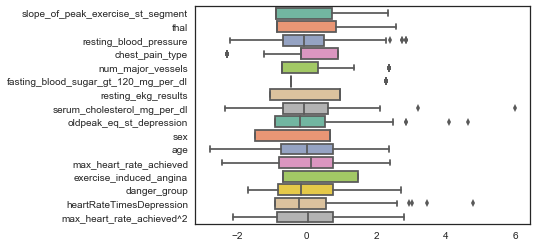

In [35]:
ax = sns.boxplot(data=X, orient="h", palette="Set2")

Text(0,0.5,'oldpeak_eq_st_depression')

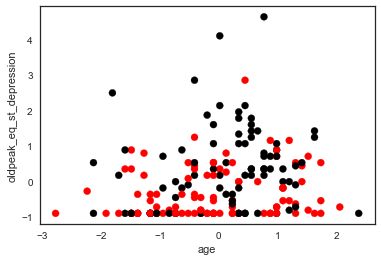

In [36]:
plt.scatter(data.iloc[:,10], data.iloc[:,8],c=data['heart_disease_present'],cmap=plt.cm.flag)
plt.xlabel("age")
plt.ylabel("oldpeak_eq_st_depression")

Text(0,0.5,'max_heart_rate_achieved')

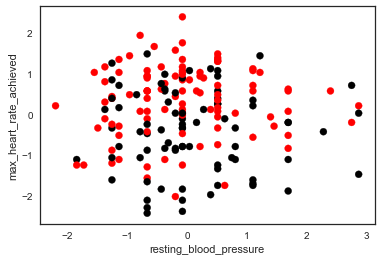

In [37]:
plt.scatter(data.iloc[:,2], data.iloc[:,11],c=data['heart_disease_present'],cmap=plt.cm.flag)
plt.xlabel("resting_blood_pressure")
plt.ylabel("max_heart_rate_achieved")

Text(0,0.5,'age')

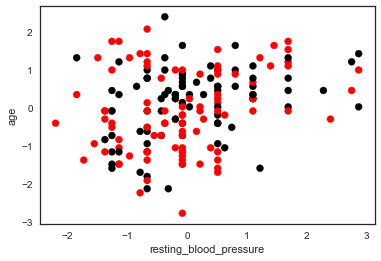

In [38]:
plt.scatter(data.iloc[:,2], data.iloc[:,10],c=data['heart_disease_present'],cmap=plt.cm.flag)
plt.xlabel("resting_blood_pressure")
plt.ylabel("age")

Text(0,0.5,'serum_cholesterol_mg_per_dl')

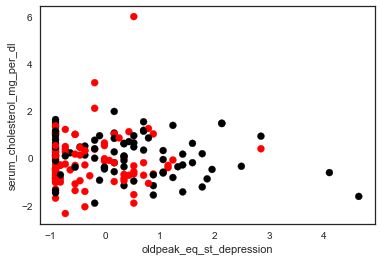

In [39]:
plt.scatter(data.iloc[:,8], data.iloc[:,7],c=data['heart_disease_present'],cmap=plt.cm.flag)
plt.xlabel("oldpeak_eq_st_depression")
plt.ylabel("serum_cholesterol_mg_per_dl")

In [40]:
#1 outlier 
data[data['oldpeak_eq_st_depression']>3.5]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,danger_group,heartRateTimesDepression,max_heart_rate_achieved^2,heart_disease_present
patient_id,,,,,,,,,,,,,,,,,
noxsnw,2.349636,0.858898,0.512222,0.902335,-0.718403,-0.438238,-1.054255,-0.612713,4.104673,0.672022,0.020291,-1.749072,1.468977,-1.658655,3.034415,-1.638469,1
usnkhx,2.349636,0.858898,1.691250,0.902335,2.385097,-0.438238,0.953850,-1.620867,4.641231,-1.488048,0.772270,-0.203768,-0.680746,-1.640994,4.791669,-0.281337,1


In [41]:
## 2 outliers
data[data['max_heart_rate_achieved']<112]

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,danger_group,heartRateTimesDepression,max_heart_rate_achieved^2,heart_disease_present
patient_id,,,,,,,,,,,,,,,,,
0z64un,-0.891241,-0.858898,-0.195195,-1.234775,-0.718403,-0.438238,0.953850,1.118269,-0.903207,0.672022,-1.053964,0.932485,-0.680746,0.672617,-0.903251,0.946537,0
ryoo3j,0.729197,-0.858898,-1.256320,-0.166220,-0.718403,-0.438238,-1.054255,-0.669778,0.527616,-1.488048,-0.087134,0.387084,-0.680746,-0.867979,0.698168,0.332834,0
yt1s1x,-0.891241,-0.858898,-0.372049,0.902335,2.385097,-0.438238,0.953850,1.042182,-0.903207,0.672022,2.383654,0.568884,1.468977,2.707181,-0.903251,0.532412,1
l2xjde,-0.891241,0.858898,1.219639,0.902335,-0.718403,-0.438238,-1.054255,-0.498582,-0.903207,0.672022,-1.591092,1.432436,-0.680746,0.354716,-0.903251,1.548546,1
oyt4ek,2.349636,0.858898,2.752375,-2.303330,-0.718403,-0.438238,0.953850,0.395442,2.852703,0.672022,0.449994,-0.203768,-0.680746,-1.467099,2.954598,-0.281337,0
ldukkw,-0.891241,-0.858898,-0.077292,-0.166220,-0.718403,-0.438238,-1.054255,-1.316518,-0.903207,0.672022,-1.376241,0.023483,-0.680746,0.481876,-0.903251,-0.051354,0
2gbyh9,0.729197,0.858898,1.101736,0.902335,1.350597,-0.438238,0.953850,0.167180,1.421880,-1.488048,0.557419,0.341633,-0.680746,-1.128820,1.682584,0.283719,1
daa9kp,0.729197,2.576693,1.101736,0.902335,0.316097,-0.438238,0.953850,0.509572,-0.366648,0.672022,0.235143,-1.703622,1.468977,0.076553,-0.477557,-1.603699,1
3nwy2n,2.349636,0.858898,2.280764,0.902335,-0.718403,-0.438238,0.953850,1.460661,2.137292,0.672022,0.449994,-0.431019,1.468977,-1.335937,2.112079,-0.503524,1


In [42]:
# drop outliers
def drop_outliers(X):
    
    to_drop = ['l0c19s','oyt4ek','0g192k']

    X = X.drop(to_drop)
    
    return X

X = drop_outliers(X)

In [43]:
# t-SNE Clustering

C:\Users\python\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


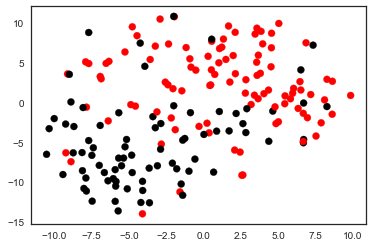

In [44]:
from sklearn.manifold import TSNE

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(data.drop('heart_disease_present',axis=1))

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=data['heart_disease_present'],cmap=plt.cm.flag)
plt.show()

In [45]:
#model

# load data
X,y,test = load_data()

# conver thal column to numerical 
conv_thal(X)
conv_thal(test)
# convert categorical columns to categorical type 
cat_col_convert()
# feature engineering
feature_eng()

# categorical columns to dummies
#X,test = Get_dummies(X,test)
# scale data
X,test = scale_data(X,test)

# drop outliers
X,y = drop_outliers(X),drop_outliers(y)


# split data for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

# SVM

In [46]:
from sklearn.svm import SVC

#rbf means gaussian
classifier = SVC(kernel = 'rbf', random_state = 22,probability=True)
classifier.fit(X_train, y_train.values.ravel())

#predict test set result
y_pred = classifier.predict(X_test)

log_loss(y_test, y_pred)

3.837686243736199

In [ ]:
"""
all = 10.553603853714954
no dummies = 8.634760731846853
no dummies no feature = 6.715939821018483

scale and drop rs=7 : 4.79714112122984
    
scale and drop ,feature eng 3.837686243736199
"""

In [58]:
from sklearn.model_selection import GridSearchCV
# svm gridsearch

svm = SVC()
parameters = {'kernel':('linear', 'rbf'), 'C':(1,0.25,0.5,0.75,0.001, 0.01, 0.1,  10),'gamma': (1,2,3,0.001, 0.01, 0.1,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train.values.ravel())
y_pred = classifier.predict(X_test)

log_loss(y_test, y_pred)

9.992007221626415e-16

In [48]:

# predict real data

classifier.fit(X, y.values.ravel())
y_pred = classifier.predict_proba(test)[:,1]

submission = pd.DataFrame({
        "patient_id": test.index,
        "heart_disease_present": y_pred
    })

## SKLEARN NN

In [49]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(max_iter=400)

mlp.fit(X_train,y_train.values.ravel())

y_pred = mlp.predict(X_test)

log_loss(y_test, y_pred)

C:\Users\python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


6.715984243097939

In [50]:
## predict real data

mlp = MLPClassifier(max_iter=400)

mlp.fit(X,y.values.ravel())

y_prob = mlp.predict_proba(test)[:,1] # This will give you positive class prediction probabilities  

submission = pd.DataFrame({
        "patient_id": test.index,
        "heart_disease_present": y_prob
    })


C:\Users\python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# GRID SEARCH

In [51]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=200)

parameter_space = {
    'hidden_layer_sizes': [(10,),(2,) , (4,)],
    'activation': ['tanh', 'relu',"logistic"],
    'solver': [ 'adam','sgd'],
    'alpha': [0.0001, 0.05, 0.001],
    'learning_rate': ['constant','adaptive',"invscaling"]
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X_train,y_train.values.ravel())
y_pred = clf.predict(X_test)


log_loss(y_test, y_pred)

C:\Users\python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


5.756551576644025

In [52]:
print(log_loss(y_test, y_pred))

print('Best parameters found:\n', clf.best_params_)



5.756551576644025
Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [53]:
# predict real data

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)

clf.fit(X,y.values.ravel())
y_prob = clf.predict_proba(test)[:,1]

submission = pd.DataFrame({
        "patient_id": test.index,
        "heart_disease_present": y_prob
    })


C:\Users\python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [54]:
import xgboost as xgb

In [55]:
cv_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
ind_params = {'learning_rate': 0.1, 'n_estimators': 1000, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'binary:logistic'}
optimized_GBM = GridSearchCV(xgb.XGBClassifier(**ind_params), 
                            cv_params, 
                             scoring = 'accuracy', cv = 5, n_jobs = -1) 

In [56]:
optimized_GBM.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [57]:
y_pred = optimized_GBM.predict(X_test)
log_loss(y_test, y_pred)

C:\Users\python\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


5.756551576644025

In [ ]:
# Submission

submission.to_csv("heart_submission_SVM3.5ASISALL.csv", index=False)